# Visualisation 2 (Week 4) – Deaths code + Graph


In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as ticker
#Read in from Raw url , updates everyday.
death = "https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv"
#Create a dataframe with confirmed cases and turns the date columsn into date objects instead of strings
df = pd.read_csv(death, parse_dates=True)
#Drop the province/state column as it is redundent for our objective
df.drop(columns=['Province/State','Lat','Long'], inplace = True )
#Melt function to narrow our dataframe and make Date it's own columm / index
df = df.melt(['Country/Region'],df.drop('Country/Region', axis=1),'Date', 'Deaths', 0)

#setting country and date as our index for later iterations and data manipulation
df = df.set_index(['Country/Region', 'Date'])
#Group by country / date to see each country in order with every date + add confirmed cases column
df = df.groupby(['Country/Region', 'Date'])['Deaths'].sum()
df = pd.DataFrame(df)
#Reset index so we can access Date adn change all the dates to datetime objects.
df = df.reset_index()
df['Date'] = pd.to_datetime(df['Date'])
#Drop all columns from our dataframe that has less than 100 confirmed cases
df = df.loc[(df.drop(columns=['Country/Region','Date']) >= 10).any(1)]
#Make a Number of Days since the 100th date column and fill them with null values
df['Number of Days'] = df['Date'] - df['Date']
#Reset index to allow for sorting in alphabetical order 
df = df.set_index(['Country/Region', 'Date'])
df = df.sort_values(['Country/Region', 'Date'], ascending = True)

In [22]:
for row in df.iterrows():
    df.loc[row[0][0], 'Number of Days'] = np.arange(0, len(df.loc[row[0][0], 'Number of Days']), 1)

In [23]:
countries = set()
for row in df.iterrows():
    countries.add(row[0][0])

In [24]:
df = df.reset_index()

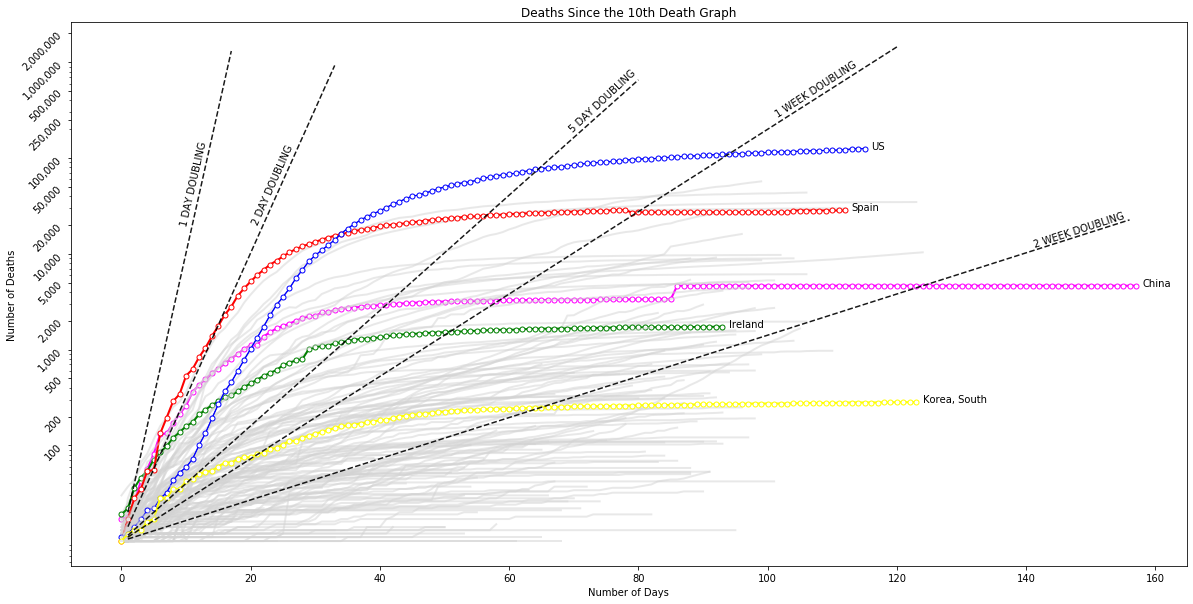

In [25]:
#Creating my figure to allow for multiple plots
fig = plt.figure(figsize=(20,10))
#For loop that uses my country set to create a df for every country, a list of data for that country and plot it.
#If statements used to make certain countries stand out 
for country in countries:
    
    country_df = df[df['Country/Region'] == country ]
    numDay_list = country_df["Number of Days"].tolist()
    confirmed_list = country_df["Deaths"].tolist()
    x = numDay_list
    y = confirmed_list
    plt.plot(x, y, label = country, color = 'lightgray', linewidth=2, alpha=0.5)
    
    
    if country == 'US':
        plt.plot(x, y, label = country, color='blue', linewidth=1)
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='blue', linewidth=1)
        plt.annotate(country , xy=(numDay_list[-1] + 1, confirmed_list[-1] + 1), color='Black')
                     
    if country == 'Ireland':
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='Green', linewidth=2)
        plt.annotate(country , xy=(numDay_list[-1] + 1, confirmed_list[-1] + 1), color='Black')
        
    if country == 'Spain':
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='red', linewidth=2)
        plt.annotate(country , xy=(numDay_list[-1] + 1, confirmed_list[-1] + 1), color='Black')

    if country == 'China':
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='magenta', linewidth=2)
        plt.annotate(country , xy=(numDay_list[-1] + 1, confirmed_list[-1] + 1), color='Black')
        
    if country == 'Korea, South':
        plt.plot(x, y, label = country, marker='o', markerfacecolor='white', markersize=5, color='Yellow', linewidth=2)
        plt.annotate(country , xy=(numDay_list[-1] + 1, confirmed_list[-1] + 1), color='Black')
        
#Making x a list of the amount of days to allow doubling line to continue until the last day
#This will also allow X to update everyday with my data
x = list(range(1, df['Number of Days'].max()))
    
#1day double
double1 = [(2**(element)) * y[0] for element in x]
plt.plot(x[:17], double1[:17], 'k--', alpha=.9)
plt.annotate('1 DAY DOUBLING' , xy=(x[8], double1[10]), color='Black', rotation=77)
#2day double
double2 = [(2**(element/2)) * y[0] for element in x]
plt.plot(x[:33], double2[:33],'k--', alpha=.9)
plt.annotate('2 DAY DOUBLING' , xy=(x[19], double2[21]), color='Black', rotation=66)
#5day double
double5 = [(2**(element/5)) * y[0] for element in x]
plt.plot(x[:80], double5[:80], 'k--', alpha=.9)
plt.annotate('5 DAY DOUBLING' , xy=(x[68], double5[70]), color='Black', rotation=43)
#7day double
double7 = [(2**(element/7)) * y[0] for element in x]
plt.plot(x[:120], double7[:120], 'k--', alpha=.9)
plt.annotate('1 WEEK DOUBLING' , xy=(x[100], double7[102]), color='Black', rotation=33)
#14day double
double14 = [(2**(element/14)) * y[0] for element in x]
plt.plot(x, double14, 'k--', alpha=.9)
plt.annotate('2 WEEK DOUBLING' , xy=(x[140], double14[142]), color='Black', rotation=18)

plt.title("Deaths Since the 10th Death Graph")
plt.xlabel("Number of Days")
plt.ylabel("Number of Deaths")
plt.yscale('log')
plt.yticks([100, 200, 500, 1000, 2000, 5000, 10000, 20000, 50000, 100000, 250000, 500000, 1000000, 2000000], 
           ['100', '200', '500', '1,000', '2,000', '5,000', '10,000', '20,000', '50,000', '100,000', '250,000', '500,000', '1,000,000', '2,000,000'], 
           rotation=45)

#plt.legend()
plt.show()
